# Single cell fluorescence/holographic trajectory plotting

Designed to ~~measure a series of time-dependent single cell fluorescent/holographic intensities and then~~ plot them on comparative graphs


```
Author: 
- Nathan J. Day (nathan.day.16@ucl.ac.uk)
```


### STEPS
~~1. Measure the intenstities of the cell trajectories and save out as csv and pandas dataframe~~
2. Plot these trajectories 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import ndimage
from skimage.io import imshow #used to be from skimage import io
from sklearn import preprocessing
from matplotlib import animation
from natsort import natsorted

In [2]:
def colour_picker(variable_title):
        colour_list = ["GFP", "RFP", "Phase"]
        for colour in colour_list:
            if colour in variable_title:
                if colour == "GFP": 
                    return 'green'
                elif colour == 'RFP':
                    return 'red'
                elif colour == 'Phase':
                    return 'cyan'
                else:
                    return "Could not find a suitable colour to plot in, check colour_picker function"

def normalisation(series):
    max_series = np.amax(series)
    norm_factor = 1 / max_series
    scaled_series = series * norm_factor
    return scaled_series

### Load data
If the data already exists in a .csv and just needs to be plotted then skip to this part, **but make sure you uncomment then following cell!**

+ Number of cells
+ Number of frames/timepoints (length of trajectory)

##### At time of writing this the data organisation is as follows OUT OF DATE NOW INCLUDES ADDED COLUMNS
Stats.csv:

|   |GFP Intensity|RFP Intensity|Phase Intensity|Area| x | y |
|---|-------------|-------------|---------------|----|---|---|
|1  |             |             |               |    |   |   |
|2  |             |             |               |    |   |   |
|...|             |             |               |    |   |   |
|t  |             |             |               |    |   |   |

And the directory organisation is as follows:

```
root_path/stats/mask_version/
                          Cell_ID_1.csv
                          Cell_ID_2.csv
                          ...
```
Where ```mask_version``` could be any of the following, for example
```
mask_version = { /gold
                 /modelv4
                 /modelv5
                 /cellpose_nuclear
                     ... } 
```

# Select which cell ID to plot

In [3]:
print("Input cell ID")
cell=input()

### Data location ###
root_path = "/home/nathan/data/fucci/fucci1_171201/stats/cellpose_nuclear"
fn = "cell_ID_" + str(cell) + ".csv"
stat_location = os.path.join(root_path, fn)
df = pd.read_csv(stat_location)


Input cell ID
72


In [99]:
df = pd.read_csv(os.path.join(root_path, stat_location))
print(df[:20])
print(max(df["GFP Intensity"]))

    Cell ID  Frame  GFP Intensity  RFP Intensity  Phase Intensity    Area   x  \
0        72      0         296584         311323         21040923  119059  55   
1        72      1         151499         164182         11438713   98910  49   
2        72      2         379368         393059         25157225  126485  45   
3        72      3         273897         299168         17484164  118673  38   
4        72      4         313723         332988         20291385  130491  33   
5        72      5      189129035      150588869      13515749883  129526  28   
6        72      6      186893176      149860603      13472723999  131532  23   
7        72      7      188618607      149736235      13588519865  129204  18   
8        72      8         280990         295252         18357462  139533  30   
9        72      9         319211         339718         24378559  144725  36   
10       72     10      185131416      146331570      13534725044  131088  40   
11       72     11         3

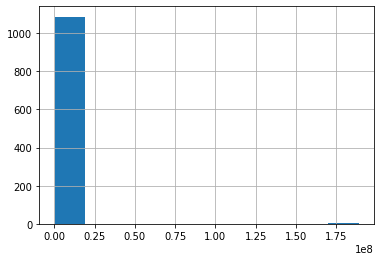

In [90]:
hist = df["GFP Intensity"].hist(bins=10)

0        296584
1        151499
2        379368
3        273897
4        313723
         ...   
1086    1535180
1087    1525943
1088    1516569
1089    1502093
1090    1562903
Name: GFP Intensity, Length: 1091, dtype: int64
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1086    1550990.6
1087    1545411.5
1088    1540119.9
1089    1533897.3
1090    1534220.8
Name: GFP Intensity, Length: 1091, dtype: float64


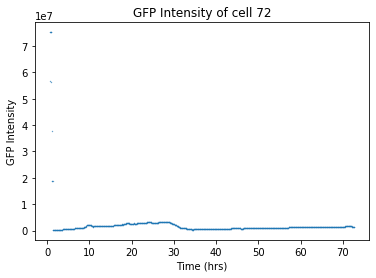

0        311323
1        164182
2        393059
3        299168
4        332988
         ...   
1086    4354609
1087    4244277
1088    4371062
1089    4247825
1090    4384909
Name: RFP Intensity, Length: 1091, dtype: int64
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1086    4335564.4
1087    4324475.2
1088    4332310.9
1089    4319437.2
1090    4327739.9
Name: RFP Intensity, Length: 1091, dtype: float64


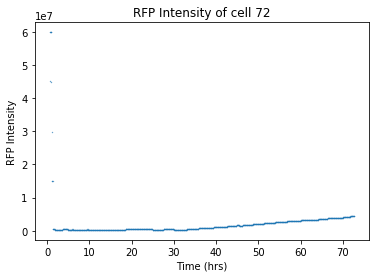

0       21040923
1       11438713
2       25157225
3       17484164
4       20291385
          ...   
1086    50560414
1087    51565350
1088    51917161
1089    49146113
1090    49148637
Name: Phase Intensity, Length: 1091, dtype: int64
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1086    52681101.4
1087    52354853.9
1088    52092206.9
1089    51546458.6
1090    51072558.9
Name: Phase Intensity, Length: 1091, dtype: float64


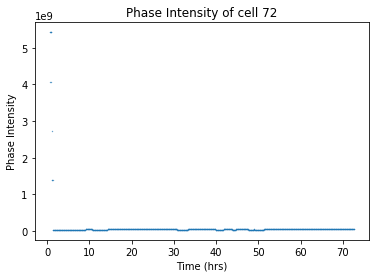

In [107]:
### Raw data plots 
"""for cell in cell_ids:
    cell_id = "cell" + cell
    #stat_location = os.path.join(cell_id, "stats.csv")
"""
df = pd.read_csv(os.path.join(root_path, stat_location))
#print(df)
x = df.index
x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins

y_variables = df.columns[2:5] #this calls just the first four variables 
for y in y_variables:
    intensity = df[y] 
    print(df[y])
    rolling_mean_20 = df[y].rolling(window=10).mean()
    print(rolling_mean_20)
    #plt.ylim(0, 5000000)
    plt.scatter(x_time,rolling_mean_20, s= 0.1)
    plt.ylabel(y)
    plt.xlabel('Time (hrs)')
    title = y + ' of cell ' + cell
    plt.title(title)
    plt.show()
    
    """rolling_mean = df.y.rolling(window=20).mean()
    rolling_mean2 = df.y.rolling(window=50).mean()
    plt.plot(df.ds, df.y, label='AMD')
    plt.plot(df.ds, rolling_mean, label='AMD 20 Day SMA', color='orange')
    plt.plot(df.ds, rolling_mean2, label='AMD 50 Day SMA', color='magenta')
    plt.legend(loc='upper left')
    plt.show()
    """

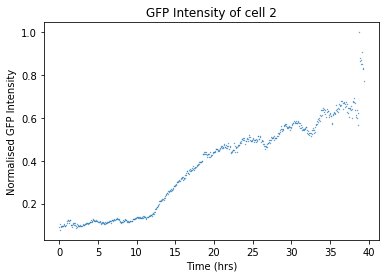

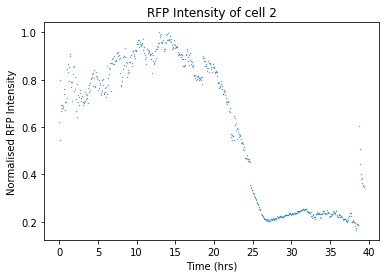

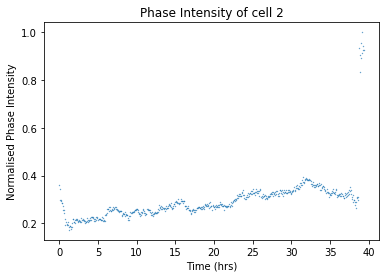

In [87]:
### Normalised data plots


df = pd.read_csv(os.path.join(root_path, stat_location))

x = df.index
x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins

y_variables = df.columns[2:5] #this calls just the first four variables 
for y in y_variables:
    #intensity = df[y] 
    norm_intensity = normalisation(df[y])      
    plt.scatter(x_time,[norm_intensity], s= 0.1)
    #plt.plot(x_time,[norm_intensity], s= 0.1)
    ylabel = "Normalised " + y
    plt.ylabel(ylabel)
    plt.xlabel('Time (hrs)')
    title = y + ' of cell ' + cell
    plt.title(title)
    plt.show()

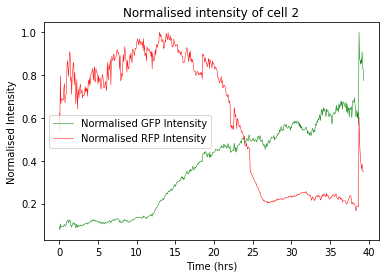

In [88]:
df = pd.read_csv(os.path.join(root_path, stat_location))
norm_df = pd.DataFrame([])

x = df.index
x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins
y_variables = df.columns[0:4] #this calls just the first four variables 

# collect different intensities to plot
for y in y_variables:
        #intensity = df[y] 
        y_name = 'Normalised ' + y
        norm_intensity = normalisation(df[y]) 
        norm_df[y_name] = norm_intensity   

#plotting intensities on same plot
for column in norm_df.columns[2:4]: #index in df.columns indicate variables to plot
    colour = colour_picker(column)
    plt.plot(x_time, norm_df[column], linewidth=0.5, color=colour, label = column)
#plt.plot(x_time, norm_df["Normalised Area"], linewidth=0.5, color="gray", label = "Normalised Area" )
plt.ylabel("Normalised Intensity")
plt.xlabel('Time (hrs)')
plt.legend()
title = "Normalised intensity of cell " + cell
#title = norm_df.columns[0]+", "+ norm_df.columns[1]+ ", "+ norm_df.columns[2]+" of cell " + cell
plt.title(title)
save_title = title + ".png"
#plt.savefig(os.path.join(root_path, cell_id, save_title), dpi=1000)
plt.show()       

In [ ]:
# overlaid multicell plots, alignment needed
norm_df = pd.DataFrame([])
norm_df_list = []
cell_ids = ["1a", "1b"]
for cell in cell_ids:
    cell_id = "cell" + cell

    stat_location = os.path.join(cell_id, "stats.csv")

    df = pd.read_csv(os.path.join(root_path, stat_location))    

    x = df.index
    x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins
    
    # collect different intensities to plot
    for y in y_variables:
            #intensity = df[y] 
            y_name = 'Normalised ' + y
            norm_intensity = normalisation(df[y]) 
            norm_df[y_name] = norm_intensity
    
    stat_location = os.path.join(cell_id, "normalised_stats.csv")
    norm_stat_file = os.path.join(root_path, stat_location)
    norm_df.to_csv(norm_stat_file, index=False)
    norm_df_list.append(norm_stat_file)
    
#need to edit these dataframes and and align them so that norm_df[i].min is all aligned 
for i, cell in enumerate(cell_ids):
    norm_df = pd.read_csv(cell_info[i].path)
    #now shift index of df so that the three column variables align
    shift1a = 0 
    shift2a = 0
    shift = 0 #amount to shift the df by
    norm_df.shift(periods=shift)

    
# for each channel
for column in norm_df.columns[2:3]: #only showing PHASE atm
    #for each cell
    for i, cell in enumerate(cell_ids):
        #print(cell)
        norm_df = pd.read_csv(cell_info[i].path)
        #colour = colour_picker(column)
        plt.plot(x_time, norm_df[column], linewidth=0.5, label = cell)#, color=colour)

    plt.ylabel("Normalised Intensity")
    plt.xlabel('Time (hrs)')
    title = column+ " of multiple cells"
    plt.title(title)
    plt.legend()
    save_title = title + ".png"
    plt.savefig(os.path.join(root_path, save_title), dpi=1000)
    plt.show()   

In [ ]:
for i, cell in enumerate(cell_ids):

    norm_df = pd.read_csv(cell_info[i].path)

    differences_df = norm_df.diff(periods=50)
    align_point = differences_df["Normalised GFP Intensity"].idxmin(axis=0) ##calculates the largest drop in gfp for alignment
    
    align_dict[cell] = align_point
    index = i+1 
    #print(len(cell_ids))
    #if i+1 > int(cell_ids[-1]):
    if i+1 > len(cell_ids)-1:
        break
    else:
        shift_amount = align_dict[cell_ids[i]] - align_dict[cell_ids[i+1]]
    print(shift_amount)
    #shift = 0 #amount to shift the df by
    #shift_df = norm_df.shift(periods=align_point)

    #plt.scatter(x_time,[shift_df["Normalised GFP Intensity"]], s= 0.1)
    #plt.show()
print(align_dict)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

norm_df = pd.read_csv(os.path.join(root_path, stat_location))


#print(norm_df)
def get_data(table,col,title):
    data = norm_df['Normalised GFP Intensity'].astype(float)
    data.columns = {title}
    return data

#%matplotlib notebook
title = 'Normalised GFP Intensity'
d = norm_df
x = np.array(d.index)
y = np.array(d['Normalised GFP Intensity'])

fluorescence = pd.DataFrame(y,x)
print(fluorescence)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
fluorescence.columns = {title}


Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=180)

fig = plt.figure(figsize=(10,6))
#plt.xlim(0, 70)
#plt.ylim(0,1)
plt.xlabel('Hours',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Normalised GFP Intensity',fontsize=20)

def animate(i):
    data = norm_df.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=5)
    plt.setp(p.lines,linewidth=2)
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=500, repeat=True)
ani.save('Normalised GFP Intensity.mp4', writer=writer)


NameError: name 'norm_df' is not defined